In [5]:
import requests
import pandas as pd
import matplotlib.pyplot as plt


In [7]:
# Load your dataset into a pandas DataFrame
df = pd.read_csv('injury_data_updated copy.csv')
print(df.head())

   Unnamed: 0  Season Year  Week Team Name Team City          Player  \
0           0       2023.0   1.0   Cowboys    Dallas   Jourdan Lewis   
1           1       2023.0   1.0   Cowboys    Dallas     Tyler Smith   
2           2       2023.0   1.0   Cowboys    Dallas    Sam Williams   
3           3       2023.0   1.0   Cowboys    Dallas  Donovan Wilson   
4           4       2023.0   1.0   Cowboys    Dallas    Malik Hooker   

   Player Jersey Position Injury Status         Injury Status Date  \
0            2.0       CB           NaN  2023-09-08T00:00:00+00:00   
1           73.0       OL      Doubtful  2023-09-08T00:00:00+00:00   
2           54.0       DE  Questionable  2023-09-08T00:00:00+00:00   
3            6.0      SAF      Doubtful  2023-09-08T00:00:00+00:00   
4           28.0      SAF  Questionable  2023-09-09T00:00:00+00:00   

                   Practice Status Injury Type  
0   Full Participation In Practice        Foot  
1  Did Not Participate In Practice   Hamstring  

In [9]:
# Display the first few rows of the dataset to understand its structure
injury_counts = df.groupby('Position')['Injury Type'].count()
print(injury_counts)

Position
C       56
CB     370
DB      93
DE     113
DL     132
DT     134
FB      20
FS       2
G      110
K       15
LB     325
LS       2
MLB      7
NT       5
OL     205
OLB     97
P       16
QB     102
RB     228
SAF    241
SS      10
T      254
TE     190
WR     423
Name: Injury Type, dtype: int64


In [11]:
# Identify the position with the highest number of injuries
highest_injuries_position = injury_counts.idxmax()
highest_injuries_count = injury_counts.max()
print(f"Position with the highest injuries: {highest_injuries_position} ({highest_injuries_count} injuries)")

Position with the highest injuries: WR (423 injuries)


In [13]:
lowest_injuries_position = injury_counts.idxmin()
lowest_injuries_count = injury_counts.min()
print(f"Position with the lowest injuries: {lowest_injuries_position} ({lowest_injuries_count} injuries)")

Position with the lowest injuries: FS (2 injuries)


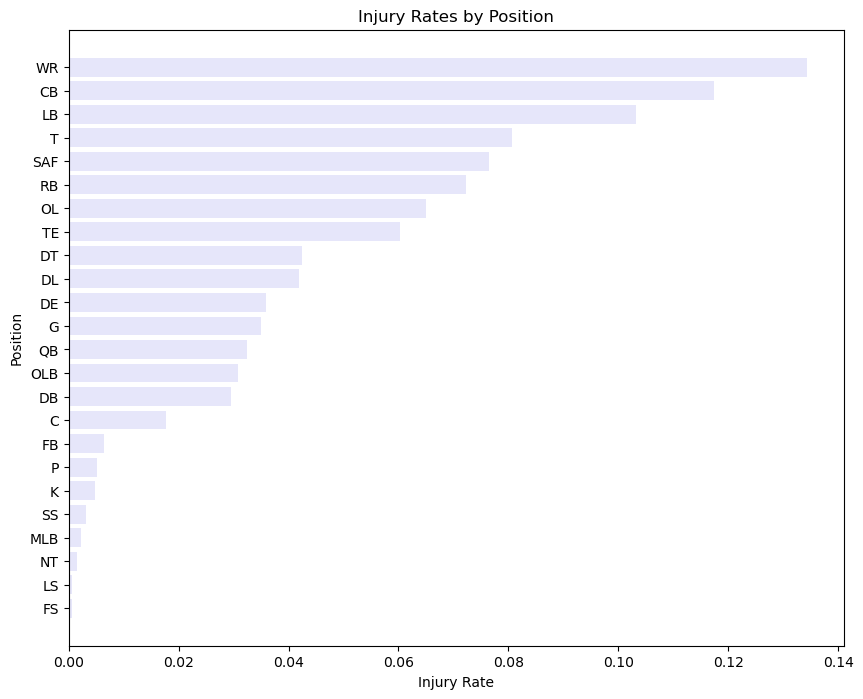

In [15]:
# Group by Position and count occurrences of Injury Type
injury_counts = df.groupby('Position')['Injury Type'].count().reset_index()
injury_counts.rename(columns={'Injury Type': 'Injury Count'}, inplace=True)

# # Calculate injury rates per position
total_injuries = injury_counts['Injury Count'].sum()
injury_counts['Injury Rate'] = injury_counts['Injury Count'] / total_injuries

# Sort by Injury Rate 
injury_counts.sort_values('Injury Rate', ascending=False, inplace=True)

# Create a Bar Chart
plt.figure(figsize=(10, 8))
plt.barh(injury_counts['Position'], injury_counts['Injury Rate'], color='lavender')
plt.xlabel('Injury Rate')
plt.ylabel('Position') 
plt.title('Injury Rates by Position')
plt.gca().invert_yaxis()  
plt.show()

In [ ]:
Analysis: Injury rate per position provides insights into the risks associated with different roles within a team. We will be able to guide decisions aimed at improving player safety, performance, and overall team success. 
Next steps: Look to see what kinds of injuries do these positions have and see what may be impacting. Find ways to eleviate some of the stress on the areas they are facing (ie rotating wr, cb and lb)